In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns

In [2]:
data = pd.read_excel("data.xlsx")
data

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0
3496,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
3497,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0
3498,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0


Ocular Disease Intelligent Recognition (ODIR) is a structured ophthalmic database of 5,000 patients with age, color fundus photographs from left and right eyes and doctors' diagnostic keywords from doctors.

This dataset is meant to represent ‘‘real-life’’ set of patient information collected by Shanggong Medical Technology Co., Ltd. from different hospitals/medical centers in China. In these institutions, fundus images are captured by various cameras in the market, such as Canon, Zeiss and Kowa, resulting into varied image resolutions.
Annotations were labeled by trained human readers with quality control management. They classify patient into eight labels including:

Normal (N),
Diabetes (D),
Glaucoma (G),
Cataract (C),
Age related Macular Degeneration (A),
Hypertension (H),
Pathological Myopia (M),
Other diseases/abnormalities (O)

In [20]:
data.columns

Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O'],
      dtype='object')

In [21]:
left = data[['Left-Fundus', 'Left-Diagnostic Keywords', 'N', 'D', 'G','C', 'A', 'H', 'M', 'O']]
right = data[['Right-Fundus', 'Right-Diagnostic Keywords', 'N', 'D', 'G','C', 'A', 'H', 'M', 'O']]
left.columns=['Fundus', 'Diagnostic Keywords', 'N', 'D', 'G','C', 'A', 'H', 'M', 'O']
right.columns=['Fundus', 'Diagnostic Keywords', 'N', 'D', 'G','C', 'A', 'H', 'M', 'O']
frames = [right, left]
combined = pd.DataFrame(pd.concat(frames))
combined.reset_index(drop=True, inplace=True)
combined.drop(['N', 'D', 'G','C', 'A', 'H', 'M', 'O'], axis = 1, inplace = True)

In [22]:
combined["Diagnosis"] = 7
combined["keyword"] = ""
for i in range(len(combined)):
    if 'normal fundus' in combined['Diagnostic Keywords'][i]:
        combined["Diagnosis"][i] = 0
        combined["keyword"][i] = 'N'
    elif 'cataract' in combined['Diagnostic Keywords'][i]:
        combined["Diagnosis"][i] = 1
        combined["keyword"][i] = 'C'
    elif combined['Diagnostic Keywords'][i] == 'glaucoma':
        combined["Diagnosis"][i] = 2
        combined["keyword"][i] = 'G'
    elif "age-related" in combined['Diagnostic Keywords'][i]:
        combined["Diagnosis"][i] = 3
        combined["keyword"][i] = 'A'
    elif "myopia" in combined['Diagnostic Keywords'][i]:
        combined["Diagnosis"][i] = 4
        combined["keyword"][i] = 'M'
    elif "hypertensive" in combined['Diagnostic Keywords'][i]:
        combined["Diagnosis"][i] = 5
        combined["keyword"][i] = 'H'
    elif "proliferative retinopathy" in combined['Diagnostic Keywords'][i]:
        combined["Diagnosis"][i] = 6
        combined["keyword"][i] = 'D'
    else:
        combined["Diagnosis"][i] = 7
        combined["keyword"][i] = 'O'

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A v

In [23]:
combined

,Fundus,Diagnostic Keywords,Diagnosis,keyword
0,0_right.jpg,normal fundus,0,N
1,1_right.jpg,normal fundus,0,N
2,2_right.jpg,moderate non proliferative retinopathy,6,D
3,3_right.jpg,branch retinal artery occlusion,7,O
4,4_right.jpg,mild nonproliferative retinopathy,6,D
...,...,...,...,...
6995,4686_left.jpg,severe nonproliferative retinopathy,6,D
6996,4688_left.jpg,moderate non proliferative retinopathy,6,D
6997,4689_left.jpg,mild nonproliferative retinopathy,6,D
6998,4690_left.jpg,mild nonproliferative retinopathy,6,D


In [24]:
combined[combined["keyword"] == 'D']["Diagnostic Keywords"].value_counts()

moderate non proliferative retinopathy                                                               745
mild nonproliferative retinopathy                                                                    460
severe nonproliferative retinopathy                                                                  144
laser spot，moderate non proliferative retinopathy                                                     29
moderate non proliferative retinopathy，laser spot                                                     26
                                                                                                    ... 
moderate non proliferative retinopathy，retinitis pigmentosa                                            1
macular epiretinal membrane，severe nonproliferative retinopathy，old branch retinal vein occlusion      1
macular epiretinal membrane，lens dust，moderate non proliferative retinopathy                           1
mild nonproliferative retinopathy，retinal pigmentation 

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


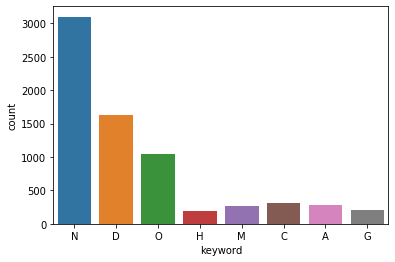

In [25]:
sns.countplot(combined["keyword"])

In [27]:
combined = combined[(combined.Diagnosis == 0) | (combined.Diagnosis == 1)]
combined.reset_index(drop=True, inplace=True)

In [28]:
combined

,Fundus,Diagnostic Keywords,Diagnosis,keyword
0,0_right.jpg,normal fundus,0,N
1,1_right.jpg,normal fundus,0,N
2,8_right.jpg,normal fundus,0,N
3,10_right.jpg,normal fundus,0,N
4,20_right.jpg,lens dust，normal fundus,0,N
...,...,...,...,...
3406,4637_left.jpg,normal fundus,0,N
3407,4639_left.jpg,normal fundus,0,N
3408,4641_left.jpg,normal fundus,0,N
3409,4672_left.jpg,normal fundus,0,N


In [29]:
combined.to_csv("combined.csv", index=False)

In [2]:
combined = pd.read_csv("combined.csv")
combined

,Fundus,Diagnostic Keywords,Diagnosis,keyword
0,0_right.jpg,normal fundus,0,N
1,1_right.jpg,normal fundus,0,N
2,8_right.jpg,normal fundus,0,N
3,10_right.jpg,normal fundus,0,N
4,20_right.jpg,lens dust，normal fundus,0,N
...,...,...,...,...
3406,4637_left.jpg,normal fundus,0,N
3407,4639_left.jpg,normal fundus,0,N
3408,4641_left.jpg,normal fundus,0,N
3409,4672_left.jpg,normal fundus,0,N


(1728, 2304, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


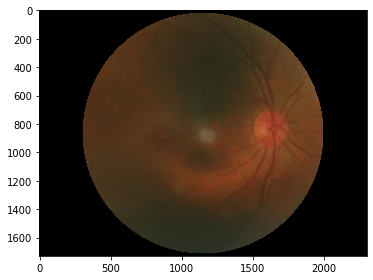

In [15]:
from skimage import io
image = io.imread("All images\\" + combined["Fundus"][0])
print(image.shape)
print(image) 
io.imshow(image)

In [31]:
combined.Diagnosis.value_counts()

0    3098
1     313
Name: Diagnosis, dtype: int64

In [4]:
n = []
c = []

for i in range(len(combined)):
    if combined['Diagnosis'][i] == 0:
        n.append(combined['Fundus'][i])
    else:
        c.append(combined['Fundus'][i])

In [5]:
import random
n = random.sample(n, 313)

In [6]:
print(len(n))
print(len(c))

313
313


In [7]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import cv2
import os
import random
dataset_dir = "All images/"
image_size=200
dataset = []

def create_dataset(l, label):
    for i in l:
        image_path = os.path.join(dataset_dir,i)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
            print("gotten image")
        except Exception as e:
            print(e)
        dataset.append([np.array(image),np.array(label)])
        print("appended!")
    return dataset
dataset = create_dataset(c,1)
dataset = create_dataset(n,0)

gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten imag

appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
gotten image
appended!
g

In [8]:
random.shuffle(dataset)

In [9]:
dataset[1][1]

array(1)

In [10]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [11]:
x[0].shape

(200, 200, 3)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=10)

In [13]:
from tensorflow.keras.applications import ResNet50
resnet = ResNet50(weights="imagenet", include_top = False, input_shape=(200,200,3))

for layer in resnet.layers:
    layer.trainable = False

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               12845184  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 36,433,025
Trainable params: 12,845,313
Non-trainable params: 23,587,712
_________________________________________________________________


In [15]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [16]:
model.fit(x_train, y_train, batch_size=8, epochs=10,verbose=1)

Epoch 1/10
55/55 [==============================] - 21s 386ms/step - loss: 6.3854 - accuracy: 0.8402
Epoch 2/10
55/55 [==============================] - 25s 461ms/step - loss: 1.1629 - accuracy: 0.9452
Epoch 3/10
55/55 [==============================] - 25s 458ms/step - loss: 0.0616 - accuracy: 0.9749
Epoch 4/10
55/55 [==============================] - 25s 456ms/step - loss: 0.1359 - accuracy: 0.9726
Epoch 5/10
55/55 [==============================] - 25s 452ms/step - loss: 0.1016 - accuracy: 0.9909
Epoch 6/10
55/55 [==============================] - 25s 452ms/step - loss: 0.0112 - accuracy: 0.9977
Epoch 7/10
55/55 [==============================] - 25s 451ms/step - loss: 0.0069 - accuracy: 0.9954
Epoch 8/10
32/55 [================>.............] - ETA: 10s - loss: 0.0011 - accuracy: 1.0000

KeyboardInterrupt: 

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = model.predict(x_test)
#print(y_pred)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[77  7]
 [ 9 95]]
0.9148936170212766
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        84
           1       0.93      0.91      0.92       104

    accuracy                           0.91       188
   macro avg       0.91      0.92      0.91       188
weighted avg       0.92      0.91      0.91       188



In [12]:
model_json = model.to_json()
with open("o_model.json", "w") as json_file:
    json_file.write(model_json)

In [13]:
model.save_weights("model_o_weights.h5")

In [2]:
from keras.models import model_from_json
model = model_from_json(open('o_model.json').read())
model.load_weights('model_o_weights.h5')

In [93]:
import cv2
import numpy as np
import pandas as pd
combined = pd.read_csv("combined.csv")
image = cv2.imread("All images\\" + combined["Fundus"][1], cv2.IMREAD_COLOR)
image = cv2.resize(image,(200,200))
image = np.array(image).reshape(-1, 200,200,3)

In [94]:
pred = model.predict(image)
print(pred)
if pred > 0.5:
    pred = 1
else:
    pred = 0
print(pred)

[[1.0438131e-16]]
0


In [4]:
combined[combined["Diagnosis"] == 1]

,Fundus,Diagnostic Keywords,Diagnosis,keyword
5,24_right.jpg,cataract,1,C
22,81_right.jpg,moderate non proliferative retinopathy，cataract,1,C
31,112_right.jpg,cataract,1,C
50,188_right.jpg,cataract,1,C
58,218_right.jpg,cataract,1,C
...,...,...,...,...
2166,2246_left.jpg,cataract,1,C
2167,2247_left.jpg,cataract,1,C
2168,2248_left.jpg,cataract，lens dust,1,C
2169,2251_left.jpg,lens dust，cataract,1,C
